In [10]:
import QuantumToolbox as qt
import CairoMakie as cm
import SuperconductingCavities as SC
using Revise

In [23]:
using Logging
using MiniLoggers
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(ProgressLogger);

In [16]:
Mode3 = SC.Circuits.Transmon_Resonators.load("ModelSaves/Mode3/Mode3.json");
proj_dict = SC.Utils.Get_Projection_Ops(Mode3.dressed_states);

In [24]:
pulse =  Mode3.Stuff["op_drive_params"]["sb_f0g1"];

stroboscopic_times = SC.Dynamics.Get_Stroboscopic_Times(pulse)
ψf0 = Mode3.dressed_states[(2,0)];
run_res =  SC.Dynamics.RunSingleOperator(Mode3,  ψf0, pulse,  tspan =  stroboscopic_times);

[2024-11-06 12:30:35] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-11-06 12:30:38] Info: Time Evolution Complete
[2024-11-06 12:30:38] Info: Done with DEFAULT


In [26]:
floq_sweep = SC.Dynamics.Get_Pulse_Floquet_Sweep(Mode3.hilbertspace, Mode3.n̂ₜ, pulse; stroboscopic_times=stroboscopic_times);

[2024-11-06 12:34:18] Info: Beginning Floquet Sweep


Progress: 100%|█████████████████████████████████████████| Time: 0:00:30


[2024-11-06 12:34:49] Info: Done With Floquet Sweep
[2024-11-06 12:34:49] Info: Tracking State


Progress:  17%|███████▏                                 |  ETA: 0:00:08

[2024-11-06 12:34:51] Info: Running the necessary time evolutions


In [29]:
floq_projections = SC.Dynamics.Pulse_Floquet_Projections(run_res, floq_sweep);

[2024-11-06 12:39:38] Info: Making Plot


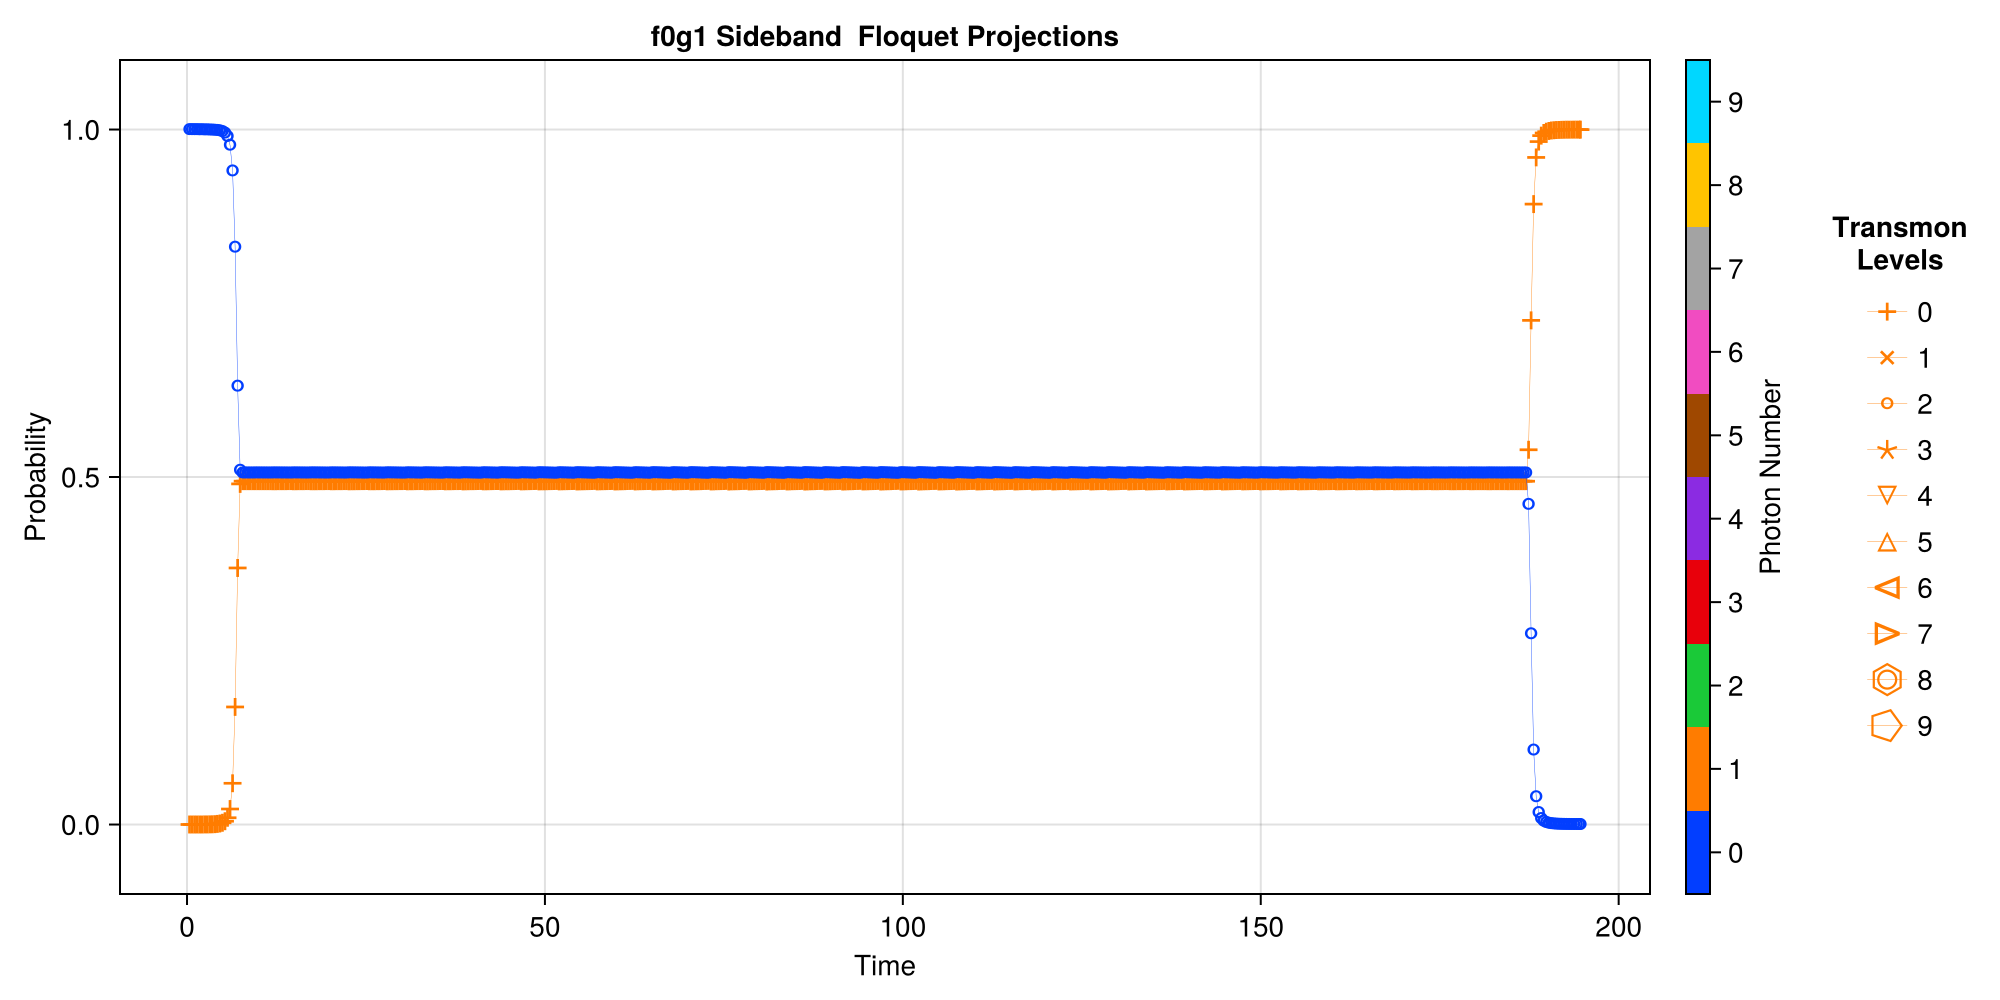

In [34]:
axis_kwargs = Dict{Any, Any}("title" => "f0g1 Sideband  Floquet Projections")
SC.Dynamics.PlotSingleModeEvolution(Mode3, run_res.times, floq_projections; axis_kwargs = axis_kwargs, emph_states = [(2,0), (0,1)]);